In [3]:
#module imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#SKLEARN
from sklearn.model_selection import train_test_split

#
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve

#
from sklearn.cluster import KMeans

#
from sklearn.mixture import GaussianMixture

In [5]:
filepath = "./Task 3 and 4_Loan_Data.csv"
data = pd.read_csv(filepath)
print ('shape of data: ',data.shape)
data.head()

shape of data:  (10000, 8)


,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


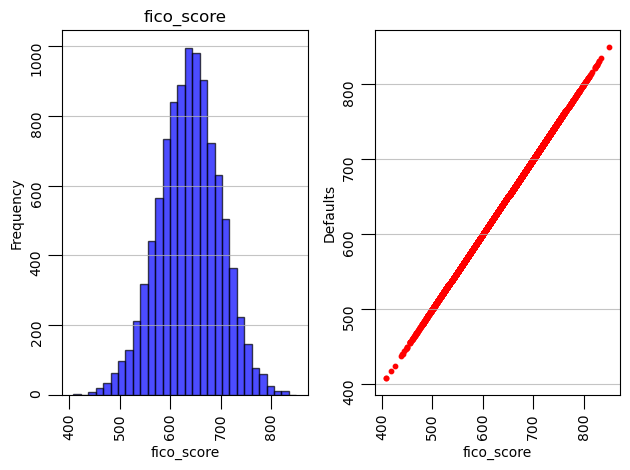

In [7]:
data2 = data.copy()           # Create a copy of the original DataFrame
data = data2[['fico_score']]

headers = data.columns.tolist()
#PLOTTING

for i in range(len(headers)):
  fig, axes = plt.subplots(1, 2)

  axes[0].hist(data[headers[i]], bins=30, color='blue', edgecolor='black', alpha=0.7)
  axes[0].set_title(headers[i])
  axes[0].set_xlabel(headers[i])
  axes[0].set_ylabel("Frequency")

  axes[0].grid(axis='y', alpha=0.75)
  axes[0].tick_params(size=10, rotation=90)



  axes[1].scatter(data[headers[i]], data[headers[-1]], color='red', marker='o', s=10)
  axes[1].set_xlabel(headers[i])
  axes[1].set_ylabel('Defaults')

  axes[1].grid(axis='y', alpha=0.75)
  axes[1].tick_params(size=10, rotation=90)

  fig.tight_layout()



Text(0, 0.5, 'SSE')

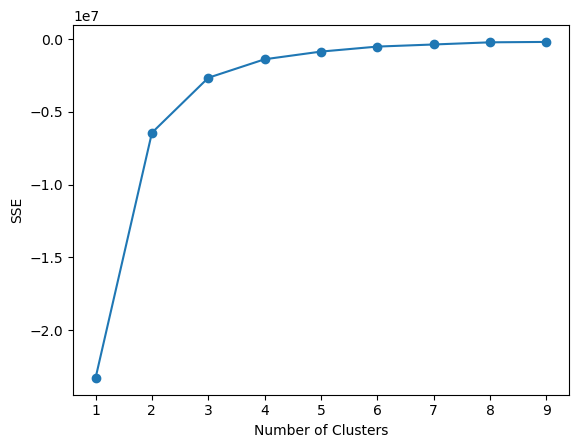

In [9]:
#kmeans clustering
X = data['fico_score'].values.reshape(-1, 1)
sse=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, random_state=42).fit(X)
  # Compute SSE (inertia_)
  sse.append(kmeans.inertia_)

sse=np.array(sse,float)
#plt.plot(range(1,11), sse, marker='o')
plt.plot(range(1,10), np.diff(sse, n=1), marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')


In [11]:
n_buckets=6

kmeans = KMeans(n_clusters=n_buckets, random_state=42).fit(X)
#data['Cluster_Label'] = kmeans.fit_predict(X)

#extract and sort cluster centers
sorted_centers = np.sort(kmeans.cluster_centers_.flatten())

#calculate boundaries (midpoints between sorted cluster centers)
boundaries = [(sorted_centers[i] + sorted_centers[i+1]) / 2 for i in range(len(sorted_centers) - 1)]

#add minimum and maximum boundaries for full coverage
boundaries = [0] + boundaries + [900]

print (boundaries)


[0, 547.1626055399204, 598.5959732058461, 640.0976868476866, 680.2713111128785, 727.2448388928581, 900]


In [13]:
n_buckets=6
# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=n_buckets, random_state=42)
gmm.fit(X)

means = np.sort(gmm.means_.flatten())
boundaries = np.concatenate([[0], (means[:-1] + means[1:]) / 2, [900]])

print (boundaries)

[  0.         552.93578451 600.09473658 640.25611169 679.38032379
 722.06672083 900.        ]


In [15]:
value = float (input(f"Enter FICO value: "))

for i in range(len(boundaries) - 1):
    if boundaries[i] <= value < boundaries[i + 1]:
        print(len(boundaries) - 1 - i)
        break
else:
    print("Value is out of range!")  # Handle case when value doesn't fit in any bucket
      

Enter FICO value:  500


6
